AUTHOR: SRINIVASA RAO SAMMIDI
COURSE: ADTA 5410
PROGRAM: ASSIGNMENT 3
PROCESS: read a text file and iterate over the lines count the consonants in a line and report back the number sort the list by the number of consonants and write a file.
OUTPUT: prints the lists in numerical order by state and creates a csv file of the list.

In [47]:
#Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [48]:
##Import the dataset 
diamonds= pd.read_excel("diamondswmissing.xlsx")
diamonds.head()

,obs,price,Carat,cut,color,clarity,depth,table,x,y,z
0,1,326,NaN,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,2,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,3,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,4,334,0.29,Premium,I,VS2,62.4,58.0,4.20,NaN,2.63
4,5,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,NaN


In [49]:
# Calculate the average price of diamonds
average_price = diamonds['price'].mean()
average_price

3932.799721913237

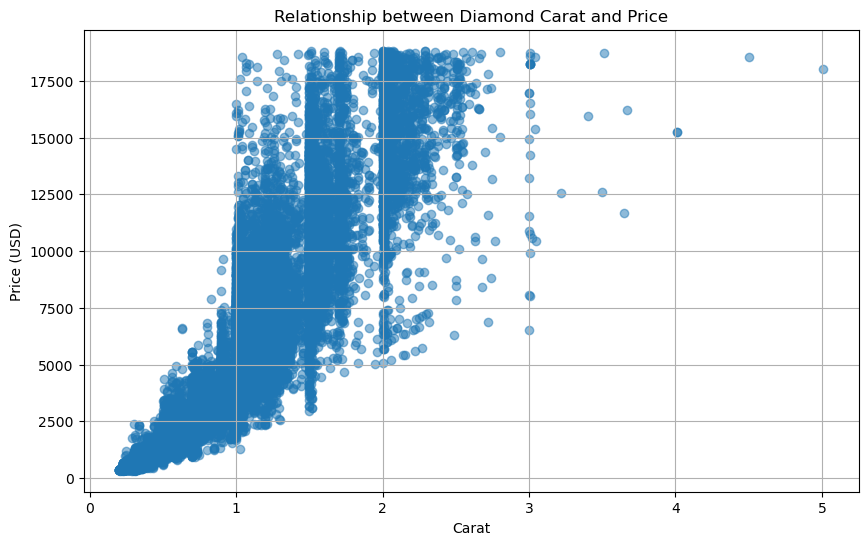

In [50]:
# Plotting the relationship between carat and price
plt.figure(figsize=(10, 6))
plt.scatter(diamonds['Carat'], diamonds['price'], alpha=0.5)
plt.title('Relationship between Diamond Carat and Price')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [51]:
# Train the OLS regression model again for comparison
ols_model = LinearRegression()
ols_model.fit(X_train_ridge_clean, y_train_ridge_clean)

# Predict using the OLS regression model
y_pred_ols = ols_model.predict(X_test_ridge_clean)

# Calculate the Mean Squared Error for the OLS regression model
mse_ols = mean_squared_error(y_test_ridge_clean, y_pred_ols)

mse_ols, mse_ridge

(1266391.3785991229, 1267034.233005133)

In [52]:
# Calculate the proportion of missing values in 'Carat' or 'z' columns
missing_carat_or_z = diamonds['Carat'].isnull() | diamonds['z'].isnull()
proportion_missing = missing_carat_or_z.mean()

proportion_missing

0.12877271041898405

In [53]:
# Drop rows with missing values in the independent variables
X_train_ridge_clean = X_train_ridge.dropna()
y_train_ridge_clean = y_train_ridge.loc[X_train_ridge_clean.index]

# Do the same for the test set
X_test_ridge_clean = X_test_ridge.dropna()
y_test_ridge_clean = y_test_ridge.loc[X_test_ridge_clean.index]

# Train OLS regression model (Linear Regression) again
ols_model.fit(X_train_ridge_clean, y_train_ridge_clean)

# Re-initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)

# Train Ridge regression model again
ridge_model.fit(X_train_ridge_clean, y_train_ridge_clean)

# Predict using OLS and Ridge regression models
y_pred_ols = ols_model.predict(X_test_ridge_clean)
y_pred_ridge = ridge_model.predict(X_test_ridge_clean)

# Calculate Mean Squared Error for both models
mse_ols = mean_squared_error(y_test_ridge_clean, y_pred_ols)
mse_ridge = mean_squared_error(y_test_ridge_clean, y_pred_ridge)

mse_ols, mse_ridge

(1266391.3785991229, 1267034.233005133)

In [54]:
# Initialize the Lasso regression model
lasso_model = Lasso(alpha=1.0)

# Train the Lasso regression model
lasso_model.fit(X_train_ridge_clean, y_train_ridge_clean)

# Predict using the Lasso regression model
y_pred_lasso = lasso_model.predict(X_test_ridge_clean)

# Calculate Mean Squared Error for the Lasso model
mse_lasso = mean_squared_error(y_test_ridge_clean, y_pred_lasso)

# Extract the coefficients to see which features were selected
lasso_coefficients = pd.Series(lasso_model.coef_, index=X_train_ridge_clean.columns)

mse_lasso, lasso_coefficients[lasso_coefficients != 0]  # Return only the non-zero coefficients selected by Lasso


(1275258.9527443247,
 Carat            11062.406442
 depth              -73.624976
 table              -29.458007
 x                 -969.086985
 cut_Good           539.387991
 cut_Ideal          787.983435
 cut_Premium        712.068741
 cut_Very Good      683.415358
 color_E           -132.452267
 color_F           -194.097678
 color_G           -395.740736
 color_H           -896.841091
 color_I          -1387.414690
 color_J          -2264.934481
 clarity_IF        4796.993586
 clarity_SI1       3171.590040
 clarity_SI2       2235.126450
 clarity_VS1       4077.336372
 clarity_VS2       3771.200118
 clarity_VVS1      4502.089752
 clarity_VVS2      4421.817526
 dtype: float64)

In [55]:
# Initialize the ElasticNet regression model
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio balances Lasso and Ridge

# Train the ElasticNet regression model
elasticnet_model.fit(X_train_ridge_clean, y_train_ridge_clean)

# Predict using the ElasticNet regression model
y_pred_elasticnet = elasticnet_model.predict(X_test_ridge_clean)

# Calculate Mean Squared Error for the ElasticNet model
mse_elasticnet = mean_squared_error(y_test_ridge_clean, y_pred_elasticnet)

# Compare the MSE of ElasticNet with Lasso and Ridge
mse_elasticnet, mse_lasso, mse_ridge


(3326592.761999634, 1275258.9527443247, 1267034.233005133)

In [56]:
# Create a combination of 'color' and 'clarity' columns
color_clarity_combination = diamonds.groupby(['color', 'clarity']).size().reset_index(name='count')

# Find the most common combination
most_common_combination = color_clarity_combination.loc[color_clarity_combination['count'].idxmax()]

most_common_combination

color         E
clarity     VS2
count      2321
Name: 13, dtype: object

In [57]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in 'price' and 'carat' columns
price_outliers, price_lower, price_upper = detect_outliers_iqr(diamonds, 'price')
carat_outliers, carat_lower, carat_upper = detect_outliers_iqr(diamonds, 'Carat')

# Count of outliers in both columns
price_outliers_count = price_outliers.shape[0]
carat_outliers_count = carat_outliers.shape[0]

price_outliers_count, carat_outliers_count, price_lower, price_upper, carat_lower, carat_upper

(3540, 1697, -5611.375, 11885.625, -0.5599999999999999, 2.0)

In [58]:
# Train the Ridge regression model
ridge_model = Ridge(alpha=1.0)

# Fit the model using the cleaned training data
ridge_model.fit(X_train_ridge_clean, y_train_ridge_clean)

# Predict on the test data
y_pred_ridge = ridge_model.predict(X_test_ridge_clean)

# Calculate the Mean Squared Error for the Ridge regression model
mse_ridge = mean_squared_error(y_test_ridge_clean, y_pred_ridge)

# Get the coefficients of the Ridge regression model
ridge_coefficients = pd.Series(ridge_model.coef_, index=X_train_ridge_clean.columns)

mse_ridge, ridge_coefficients

(1267034.233005133,
 Carat            11186.222745
 depth              -64.889051
 table              -26.043933
 x                -1043.969729
 y                   52.643433
 z                  -29.359910
 cut_Good           646.186875
 cut_Ideal          894.437166
 cut_Premium        818.681337
 cut_Very Good      782.879973
 color_E           -184.795563
 color_F           -245.595552
 color_G           -451.392444
 color_H           -953.860402
 color_I          -1456.040230
 color_J          -2344.139901
 clarity_IF        5288.502156
 clarity_SI1       3627.110551
 clarity_SI2       2687.059212
 clarity_VS1       4542.141651
 clarity_VS2       4229.279783
 clarity_VVS1      4977.199727
 clarity_VVS2      4889.041390
 dtype: float64)